Table Of Content

# Introduction

1.1 Nama Anggota Kelompok

1.2 Penjelasan Dataset

1.3 Penjelasan Projek

# Tahapan Pengerjaan

- Import Library

- Menampilkan File Data dan Analisis Data

- Data Collecting

- Data Preprocessing

- Data Augmentasi

- Data Modelling

- Visualisasi Data

- Visualisasi Akurasi

- Model Evaluasi

- Model Prediksi

- Saving Model


# Introduction

1.1 Nama Anggota Kelompok :

KELOMPOK 2_C2_2020

Rianawati_2009106132
Fanny Dita Ayunda Putri_2009106139
Millania Zahroh_2009106140

1.2 Penjelasan Dataset
Dataset yang digunakan berisi image/foto wajah  class perempuan. Besar dari dataset yang digunakan yaitu 147 MB.

1.3 Penjelasan Projek
Projek ini bertujuan untuk klasifikasi kecantikan perempuan menggunakan variabel input data image menggunakan algoritma Convolutional Neural Network (CNN).


LINK DATASET : https://www.kaggle.com/datasets/gpiosenka/beauty-detection-data-set

IMPORT LIBRARY

In [88]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from PIL import Image
import numpy as np
import pandas as pd

MENAMPILKAN NAMA FILE GAMBAR & ANALISIS DATA

In [89]:
for dirname, _, filenames in os.walk('../Beauty/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Beauty/model1.h5
../Beauty/pa_kb.ipynb
../Beauty/test\average\001.jpg
../Beauty/test\average\002.jpg
../Beauty/test\average\003.jpg
../Beauty/test\average\004.jpg
../Beauty/test\average\005.jpg
../Beauty/test\average\006.jpg
../Beauty/test\average\007.jpg
../Beauty/test\average\008.jpg
../Beauty/test\average\009.jpg
../Beauty/test\average\010.jpg
../Beauty/test\average\011.jpg
../Beauty/test\average\012.jpg
../Beauty/test\average\013.jpg
../Beauty/test\average\014.jpg
../Beauty/test\average\015.jpg
../Beauty/test\average\016.jpg
../Beauty/test\average\017.jpg
../Beauty/test\average\018.jpg
../Beauty/test\average\019.jpg
../Beauty/test\average\020.jpg
../Beauty/test\average\021.jpg
../Beauty/test\average\022.jpg
../Beauty/test\average\023.jpg
../Beauty/test\average\024.jpg
../Beauty/test\average\025.jpg
../Beauty/test\average\026.jpg
../Beauty/test\average\027.jpg
../Beauty/test\average\028.jpg
../Beauty/test\average\029.jpg
../Beauty/test\average\030.jpg
../Beauty/test\average\031.j

In [90]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1 = os.listdir(impath)
    print("list ",l1)
    
    for i in l1:
        print("=>",i)
        l2 = os.listdir(impath+'/'+i)
        count = 0
        for j in l2:
            
            if count == 1000:
                 break
            img = Image.open(impath+i+'/'+j)
            img = img.convert('RGB')
            img =img.resize(size=(28,28))
            img = np.array(img,dtype=np.float16)/255
            
            imgs.append(np.array(img))
            #print(img.shape)
            label.append(i)
            count = count+1
            del img
    #print(list1)
    
    return np.array(imgs),label
images,labels = load_imgs("../Beauty/train/")

list  ['average', 'beautiful']
=> average
=> beautiful


In [91]:
print("type of images----> ",type(images))

type of images---->  <class 'numpy.ndarray'>


In [92]:
print("type of labels ----->",type(labels))

type of labels -----> <class 'list'>


In [93]:
print("no of images -----> ",len(images))
print("no of labels -----> ",len(labels))


no of images ----->  2000
no of labels ----->  2000


In [94]:
labels = pd.Series(labels,dtype='category')
labels

0         average
1         average
2         average
3         average
4         average
          ...    
1995    beautiful
1996    beautiful
1997    beautiful
1998    beautiful
1999    beautiful
Length: 2000, dtype: category
Categories (2, object): ['average', 'beautiful']

In [95]:
labels.value_counts()

average      1000
beautiful    1000
dtype: int64

In [96]:
labelsencoded = labels.cat.codes
labelsencoded

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Length: 2000, dtype: int8

In [97]:

d = dict(enumerate(labels.cat.categories))
print(d)   


{0: 'average', 1: 'beautiful'}


DATA COLLECTING

In [98]:
train_path = ("./train")
test_path = ("./test")
val_path = ("./valid")

DATA PREPROCESSING

In [99]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [100]:
image, label = train_generator.next()

In [101]:
labels = ['average', 'beautiful']

In [102]:
IMG_SIZE = 50

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


DATA AUGMENTASI

In [103]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [104]:
augmented_images = tf.expand_dims(image, 0)

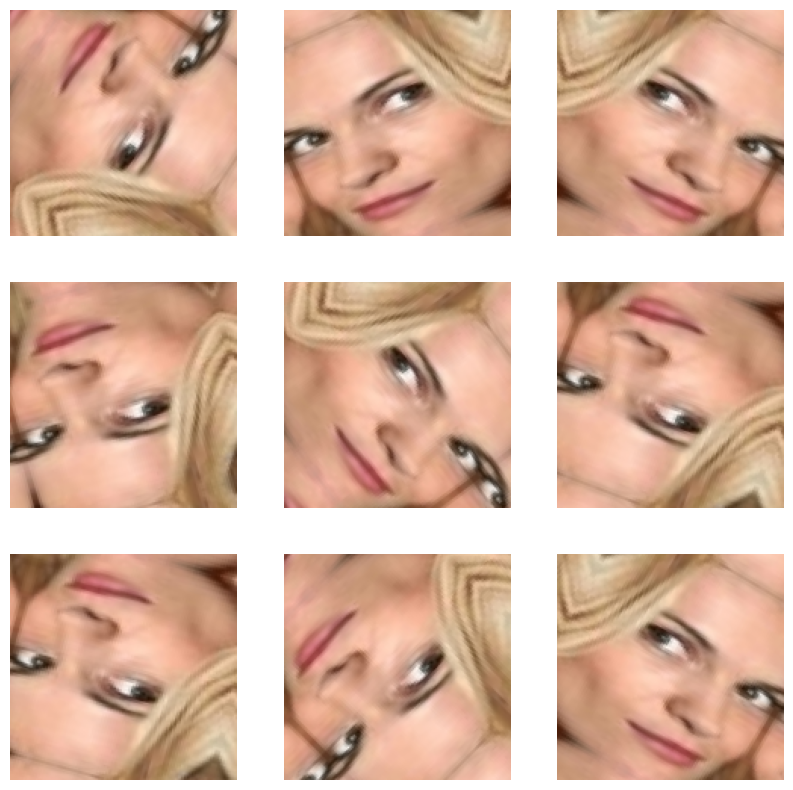

In [105]:


plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_images = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0])
  plt.axis("off")
  


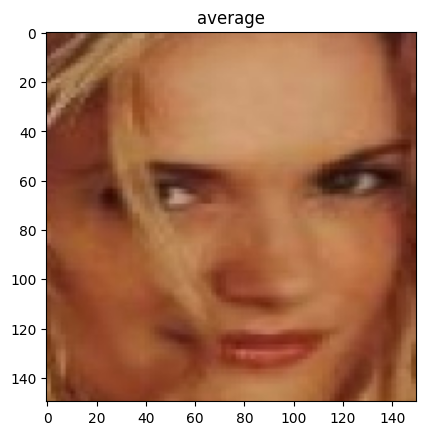

In [106]:
data = 1
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

In [107]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


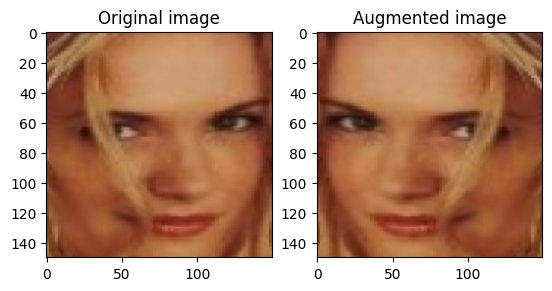

In [108]:
flipped = tf.image.flip_left_right(image[data])
visualize(image[data], flipped)

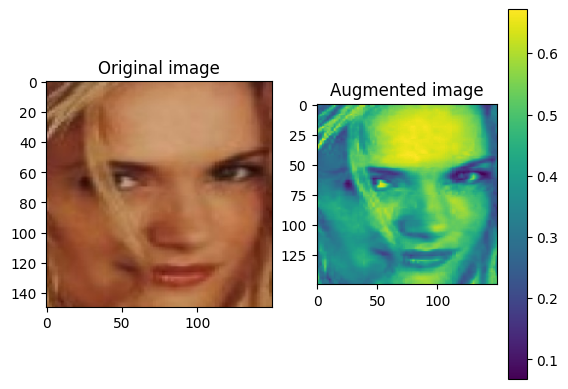

In [109]:
grayscaled = tf.image.rgb_to_grayscale(image[data])
visualize(image[data], tf.squeeze(grayscaled))
_ = plt.colorbar()

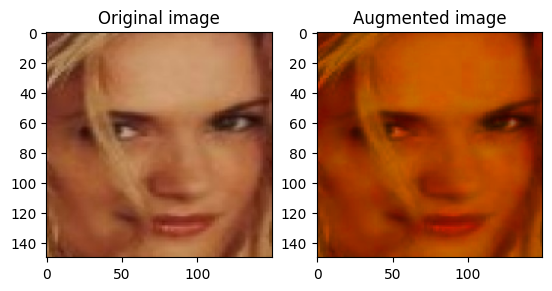

In [110]:
saturated = tf.image.adjust_saturation(image[data], 3)
visualize(image[data], saturated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


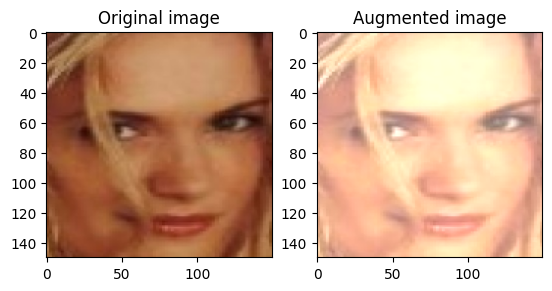

In [111]:


bright = tf.image.adjust_brightness(image[data], 0.4)
visualize(image[data], bright)



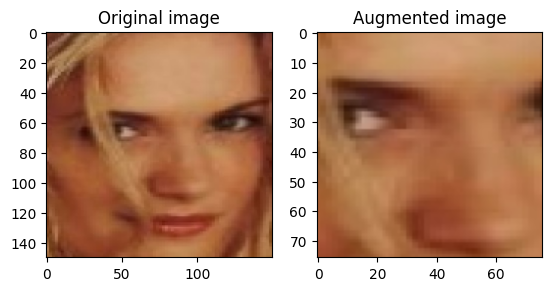

In [112]:
cropped = tf.image.central_crop(image[data], central_fraction=0.5)
visualize(image[data], cropped)

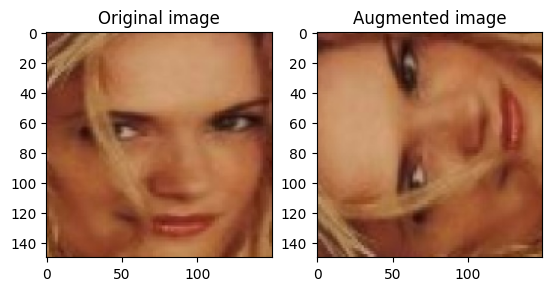

In [113]:
rotated = tf.image.rot90(image[data])
visualize(image[data], rotated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


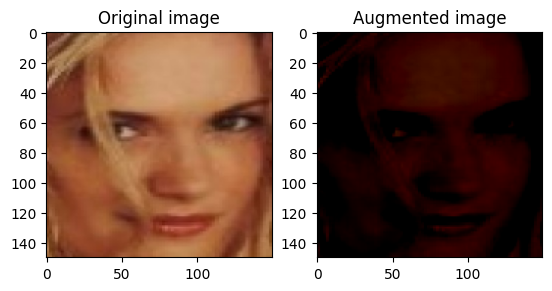

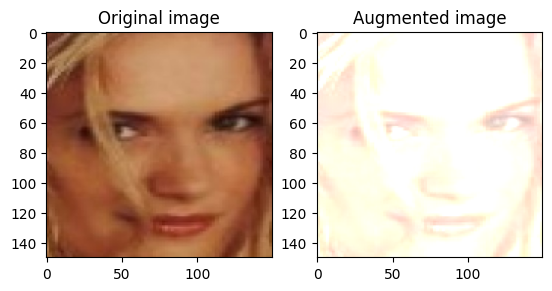

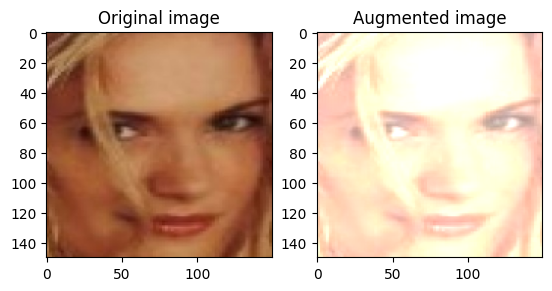

In [114]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image[data], max_delta=0.95, seed=seed)
  visualize(image[data], stateless_random_brightness)

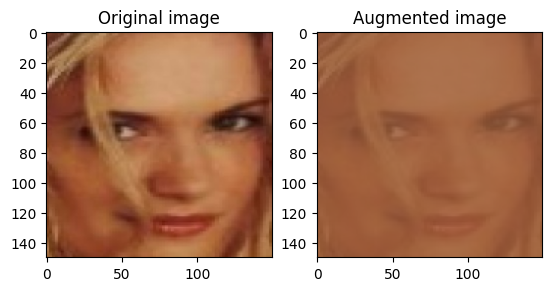

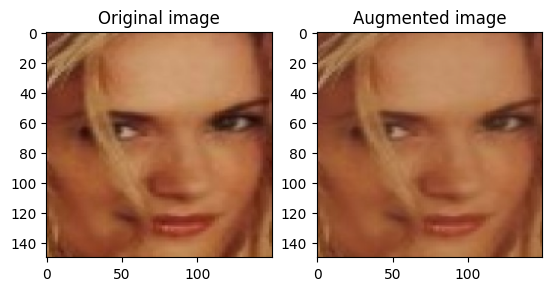

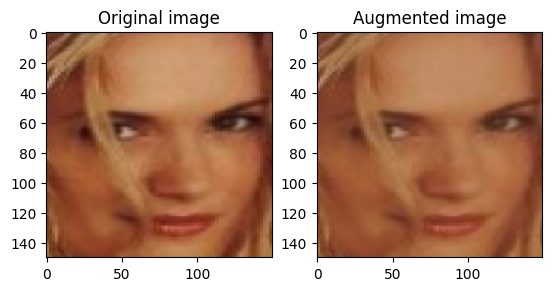

In [115]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image[data], lower=0.1, upper=0.9, seed=seed)
  visualize(image[data], stateless_random_contrast)

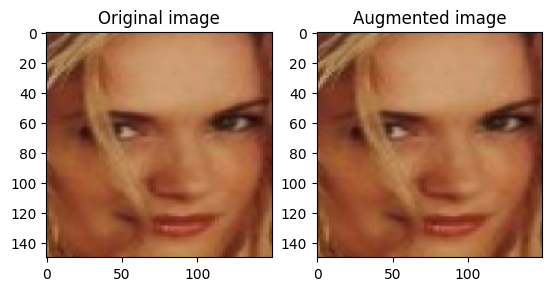

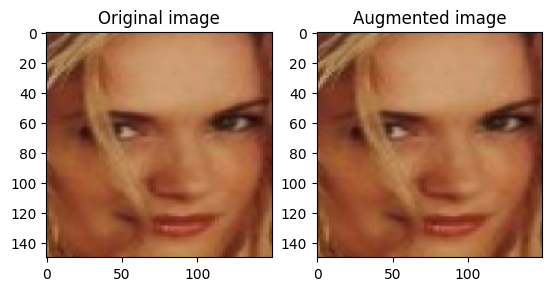

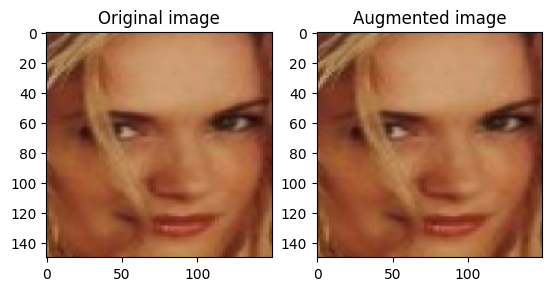

In [116]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image[data], size=[150, 150, 3], seed=seed)
  visualize(image[data], stateless_random_crop)

DATA MODELING

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')

])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [118]:
model.compile(
    optimizer= 'RMSprop',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [119]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4): #akan berhenti apabila memenuhi
            self.model.stop_training = True
            
cb = myCallback()

In [120]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = val_generator, callbacks = cb
)

Epoch 1/10
125/125 [==============================] - 99s 772ms/step - loss: 1.1774 - accuracy: 0.6463 - val_loss: 0.5686 - val_accuracy: 0.7100
Epoch 2/10
125/125 [==============================] - 112s 899ms/step - loss: 0.5347 - accuracy: 0.7738 - val_loss: 0.4196 - val_accuracy: 0.8067
Epoch 3/10
125/125 [==============================] - 247s 2s/step - loss: 0.4254 - accuracy: 0.8310 - val_loss: 0.3617 - val_accuracy: 0.8567
Epoch 4/10
125/125 [==============================] - 124s 987ms/step - loss: 0.3757 - accuracy: 0.8537 - val_loss: 0.3624 - val_accuracy: 0.8600
Epoch 5/10
125/125 [==============================] - 139s 1s/step - loss: 0.2832 - accuracy: 0.8863 - val_loss: 0.3542 - val_accuracy: 0.8500
Epoch 6/10
125/125 [==============================] - 124s 987ms/step - loss: 0.2280 - accuracy: 0.9128 - val_loss: 0.3475 - val_accuracy: 0.8700
Epoch 7/10
125/125 [==============================] - 120s 955ms/step - loss: 0.1845 - accuracy: 0.9298 - val_loss: 0.3663 - val_ac

VISUALISASI DATA

In [121]:
#train
y_acctrain = history.history['accuracy']
y_accval = history.history['val_accuracy']

#validation
y_losstrain = history.history['loss']
y_lossval = history.history['val_loss']

#epoch
x_ = range(len(y_acctrain))

VISUALISASI AKURASI

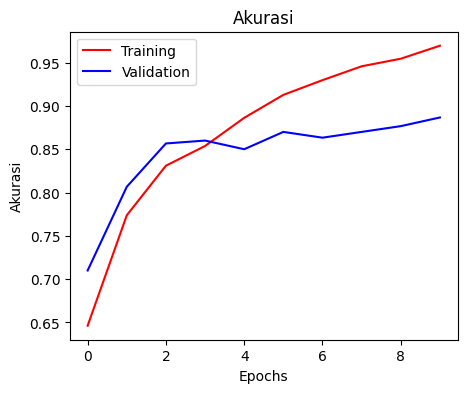

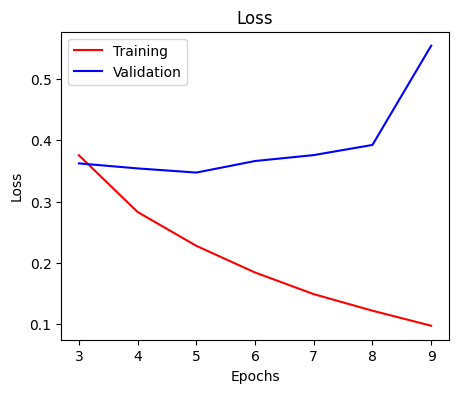

In [122]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acctrain, c='r', label='Training')
plt.plot(x_, y_accval, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_losstrain[3:], c='r', label='Training')
plt.plot(x_[3:], y_lossval[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL EVALUASI

In [123]:
model.evaluate(val_generator)

10/10 [==============================] - 4s 252ms/step - loss: 0.5544 - accuracy: 0.8867


[0.5543761253356934, 0.8866666555404663]

In [124]:
model.evaluate(test_generator)

10/10 [==============================] - 6s 603ms/step - loss: 0.4079 - accuracy: 0.8900


[0.40785452723503113, 0.8899999856948853]

MODEL PREDIKSI

In [125]:
result = model.predict(val_generator)
print(result)

10/10 [==============================] - 5s 242ms/step
[[1.08084053e-09 1.00000000e+00]
 [6.73729539e-01 3.26270491e-01]
 [9.85444129e-01 1.45559078e-02]
 [1.56858973e-02 9.84314084e-01]
 [2.81687244e-05 9.99971867e-01]
 [4.63849157e-01 5.36150873e-01]
 [8.25926157e-16 1.00000000e+00]
 [2.50541135e-08 1.00000000e+00]
 [2.51101796e-04 9.99748886e-01]
 [7.84407695e-12 1.00000000e+00]
 [1.63822576e-01 8.36177409e-01]
 [7.06288917e-03 9.92937148e-01]
 [1.00971793e-05 9.99989867e-01]
 [2.39944575e-06 9.99997616e-01]
 [9.49597955e-01 5.04019707e-02]
 [1.81871466e-02 9.81812835e-01]
 [9.92309332e-01 7.69062340e-03]
 [7.08995998e-01 2.91004002e-01]
 [1.31410879e-05 9.99986887e-01]
 [6.67446830e-06 9.99993324e-01]
 [2.37683747e-02 9.76231635e-01]
 [5.53842224e-02 9.44615722e-01]
 [9.33864594e-01 6.61353841e-02]
 [8.15342188e-01 1.84657872e-01]
 [4.07792777e-01 5.92207193e-01]
 [7.49705613e-01 2.50294387e-01]
 [4.92534775e-04 9.99507427e-01]
 [3.48582143e-05 9.99965191e-01]
 [7.80619979e-01 2.19

In [126]:
result1 = model.predict(test_generator)
print(result1)

10/10 [==============================] - 3s 259ms/step
[[1.25278141e-12 1.00000000e+00]
 [1.33651670e-03 9.98663425e-01]
 [4.27446067e-02 9.57255363e-01]
 [8.26698638e-08 9.99999881e-01]
 [7.86230385e-01 2.13769615e-01]
 [9.45217325e-05 9.99905467e-01]
 [8.26137543e-01 1.73862427e-01]
 [3.30025621e-04 9.99670029e-01]
 [9.57065165e-01 4.29348163e-02]
 [1.11021609e-12 1.00000000e+00]
 [1.80960461e-01 8.19039524e-01]
 [3.58432617e-09 1.00000000e+00]
 [1.55645413e-10 1.00000000e+00]
 [9.99953866e-01 4.60869451e-05]
 [9.93560433e-01 6.43952983e-03]
 [8.57004464e-01 1.42995551e-01]
 [7.93167591e-01 2.06832394e-01]
 [7.01480985e-01 2.98519015e-01]
 [8.43760073e-01 1.56239942e-01]
 [8.89051676e-01 1.10948369e-01]
 [7.89030707e-07 9.99999166e-01]
 [9.27351892e-01 7.26480931e-02]
 [6.22645393e-03 9.93773520e-01]
 [6.20011706e-05 9.99938011e-01]
 [1.78737452e-07 9.99999881e-01]
 [2.34061463e-06 9.99997616e-01]
 [8.23659360e-01 1.76340610e-01]
 [3.96153118e-05 9.99960423e-01]
 [3.47900033e-01 6.52

In [127]:
result2 = model.predict(train_generator)
print(result2)

125/125 [==============================] - 34s 268ms/step
[[9.8739874e-01 1.2601291e-02]
 [4.5842043e-04 9.9954164e-01]
 [4.5750177e-08 1.0000000e+00]
 ...
 [8.8110284e-08 9.9999988e-01]
 [6.2528658e-12 1.0000000e+00]
 [8.7777400e-01 1.2222597e-01]]


SAVING MODEL

In [128]:
model.save('model1.h5')